In [58]:
import numpy as np  #for numerical operations
import pandas as pd  #for 
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns  #for Improving the appearance of plots
from sklearn import datasets #for loading datasets
from sklearn.linear_model import LogisticRegression #for comaprison purpose

In [59]:
#load iris dataset 
iris = datasets.load_iris()
X = iris.data[:,:2]
Y = (iris.target!=0)*1

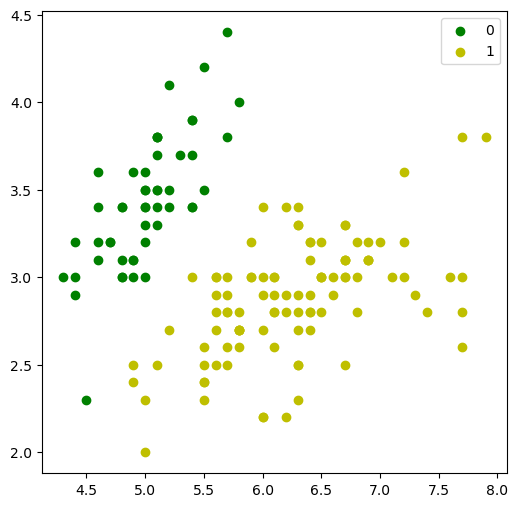

In [3]:
#plot the scatter plot for label 0 and 1 with color green and yellow
plt.figure(figsize=(6,6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='g', label='0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='y', label='1')
plt.legend();

In [33]:
#Define custom LoisticRegression class
class LogisticRegression:
    #set hyperparameter
    def __init__(self, C=0.01, max_iter=100000, fit_intercept=True, verbose=False): 
        self.C = C  #regularization parameter 'C'
        self.max_iter = max_iter  #Max iteration 
        self.fit_intercept = fit_intercept  #Intercept fitting
        self.verbose = verbose  #verbosity
        self.theta = None
    #Inplement helper methord
    #Add columns of ones to the input feature matrix 'X'
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept,X), axis=1)
    #Calculate the sigmoid function
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    #Calculate the Logistic loss funtion
    def __loss(self, h, y):
        return (-y * np.log(h) - (1-y) * np.log(1 - h)).mean()
    #if fit_intercept is True add an intercept term to the feature matrix
    def fit(self, X, Y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        for i in range(self.max_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-Y)) / Y.size
            self.theta -= self.C * gradient
            z = np.dot(X,self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, Y)
            #if verbose is True print the loss
            if (self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss:{loss}\t')
    #Predict the probability of class 1
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    #Predict binary class labels(0 or 1) based on probabilities
    def predict(self, X):
        return self.predict_prob(X).round()

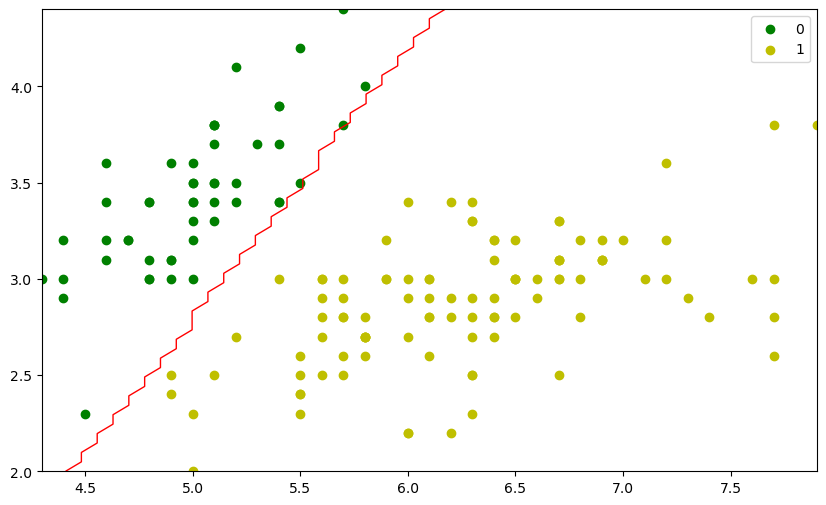

In [71]:
model = LogisticRegression(C=0.1, max_iter=30000)
model.fit(X, Y)
preds = model.predict(X)
accuracy = (preds == Y).mean()

#Create a new scatter plot of the data points with the same color scheme
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='g', label='0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='y', label='1')
plt.legend()
#Create a grid of points spanning the feature space
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
#predict class probability for each point in the grid and contour the decision boundary at 0.5
probs = model.predict(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='red');

In [72]:
#Multinomial Logistic Regression Model
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [73]:
digits = datasets.load_digits()

In [74]:
X = digits.data
Y = digits.target

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [76]:
digreg = linear_model.LogisticRegression(max_iter=10000)

In [77]:
digreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [78]:
y_pred = digreg.predict(X_test)

In [79]:
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 96.52294853963839
